# Artificial Neural Network and Multi-Layer Perceptron Models


## Introduction

Artificial Neural Networks (ANN) is a learning algorithm that imitates the human neural system. An ANN consists of multiple nodes, called neurons, that communicates through synapses. Typically, there are three sets of nodes: input nodes, intermediate nodes, and output nodes and each type of node plays unique roles. Input nodes receive input information, output nodes yield output signals, and intermediate nodes receive signals from input nodes, and manipulate the information to give results to output nodes. An ANN model can have multiple intermediate layers that contain sets of intermediate nodes, and if there exist more than two layers, we call it multi-layer perception (MLP) model.

MLPs typically use backpropagation, which starts with randomly weighted synapses and trains them with input and output values. A simplest type of MLP is a feed forward network in which the signals move in only one direction, from the input nodes, via hidden layers, to the output nodes. MLPs have some advantages compared to simple perception models, and their greater learning and prediction power is the most significant. In addition, MLP employs transfer functions that modify input signals and pass them to nodes in the next intermediate layer, using weights and biases. Eq (1) presents the specific transfer function. It should be noted that there are various types of functions such as sigmoid, tanh, and  ReLU, to estimate parameters, and their thresholds are shown in Figure 1. ReLU is a rectified linear unit that Nair and Hinton (2010) proposed. One advantage of this non-saturated function is that it speeds up the convergence of optimization. The other advantage is in tackling the vanishing gradient problem (Xu et al., 2015).

$$
\ Y=f \left( \sum_{\mathbf{i}=1}^n \mathbf{W}_\mathbf{i} \mathbf{Z}_i +\mathbf{b} \right)
\ \label{eq:vector_ray} \tag{1}
$$

$
where \\\
\ \mathbf{n} = \text{number of input signals to a node} \\\
\ \mathbf{W} = \text{weights} \\\
\ \mathbf{Z} = \text{inputs} \\\
\ \mathbf{Β} = \text{bias term} \\\
$

<img src=".\Figures\Activation_function.png">
<b> Figure 1 Three common transfer/activation functions 

Another characteristic of an MLP is that there are training processes to estimate parameters that minimize a cost function. There are several ways to train Multiple-layer perceptrons. MLP finds each layer’s parameter with a backpropagation method and optimization techniques. MLP is a nonlinear problem, so past research applies heuristics such as genetic algorithms or a gradient descent method (Mohammadian et al. 2002, and Omrani and Hichem, 2015). But these heuristics could be trapped in poor local optima when the learning process is initiated from a wrong point (Deng and Yu, 2013 and Cantarella et al. 2005). 

## MLP Application

### Prerequisite

- Sklearn (https://scikit-learn.org/stable/install.html)
   Machine Learning in Python
   install: pip install -U scikit-learn


In [1]:
# Author: Daisik Danny Nam
# Referred by Issam H. Laradji
# License: BSD 3 clause
#http://scikit-learn.org/dev/modules/neural_networks_supervised.html
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
import random
randomseed=123
random.seed(randomseed)

### Data for a hypothetical example
To illustrate this, we synthesize three small sample of data sets assuming travel time (x1) and cost (x2) as the explanatory variables, as in Figure 2, with two colors showing the binary mode choices associated with each data point.

In [2]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1)

### Split dataset into a training and test set

Overestimator or understimating is more likely to be caused by sampling noise, which could exist in the training set but not in test data, although they have the same distribution. The obvious evidence of overfitting is when the prediction power with the training set is very high but the model cannot predict effectively with non-training data(test set). There are many methods to design a sampling strategy such as K-Fold crossvalication, the size of a training set, a categorical sampling. Here, we simply sample with a random function, with a sample rate of a training set is 0.7. 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=randomseed)

Figure 2 shows the results of sampling. 

Text(0.5, 0, 'travel cost')

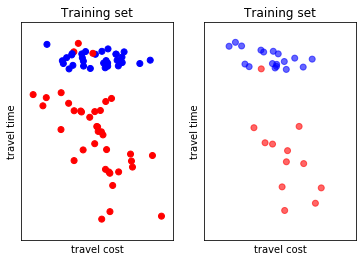

In [4]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1,2,1)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("Training set")
ax.set_ylabel("travel time")
ax.set_xlabel("travel cost")

ax = plt.subplot(1,2,2)
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("Training set")
ax.set_ylabel("travel time")
ax.set_xlabel("travel cost")


<b> Figure 2. The results of a random sampling. 

### Neural network design
The number of hidden layers and perceptrons in the neural network characterize the complex relationship between input variables and outputs.  In here, we use a simple neural network with two input variables (x1, x2) and two perceptrons for this data.

- Multi-Layer Perceptron model
- 2 layers and 2 neurons in each layer
- input: travel time and travel cost
- Hidden_layer_size=2

In [5]:
hidden_layers=[2,2]
classifier =  MLPClassifier(random_state=1, hidden_layer_sizes=hidden_layers,alpha=0.0, max_iter=10000)
X = StandardScaler().fit_transform(X)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)

0.9666666666666667


Figure 3 then graphically indicates with the same color regions where the neural network would predict the choices in a classification problem. The numbers in the sub graphs show the fraction of accurate predictions. One hidden layer with two perceptrons linearly divides the space. If we assume that the travel mode decision is based on complex combinations between time and cost, one hidden layer might not explain the travelers’ mode choice behavior well.

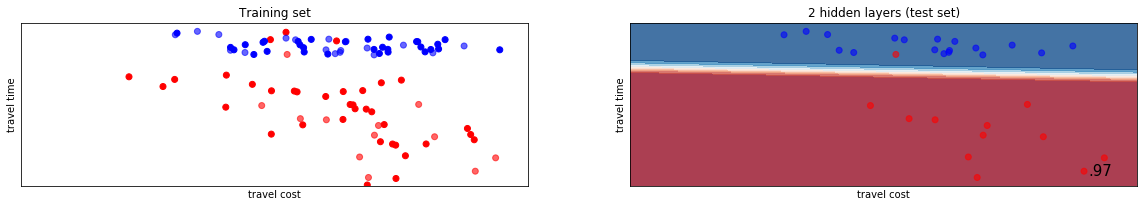

In [7]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1,2,1)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("Training set")
ax.set_ylabel("travel time")
ax.set_xlabel("travel cost")

# Plot the decision boundary. For that, we will assign a color to each
if hasattr(classifier, "decision_function"):
    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
ax = plt.subplot(1,2,2)
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
#ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           alpha=0.6)
name = "%.0f hidden layers (test set)"%len(hidden_layers)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(name)
ax.set_ylabel("travel time")
ax.set_xlabel("travel cost")
ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),size=15, horizontalalignment='right')
plt.rcParams["figure.figsize"]=20,3
#figure.subplots_adjust(left=.02, right=.98)

<b> Figure 3. An illustrative example of a simple neural network (2 hidden layers and 2 neurons in each layer)

### Overfitting and Underfitting with respect the model complexity

By increasing the number of hidden layers, the overall predictive potential increases, since the next layer divides the space of the previous step, which could recognize more complex decision patterns. This process is confirmed in Figure 4. As we increase the number of hidden layers, the decision areas are formed in similar patterns as in the original data sets. However, too many hidden layers could reduce the prediction potential because of the overfitting problem. 

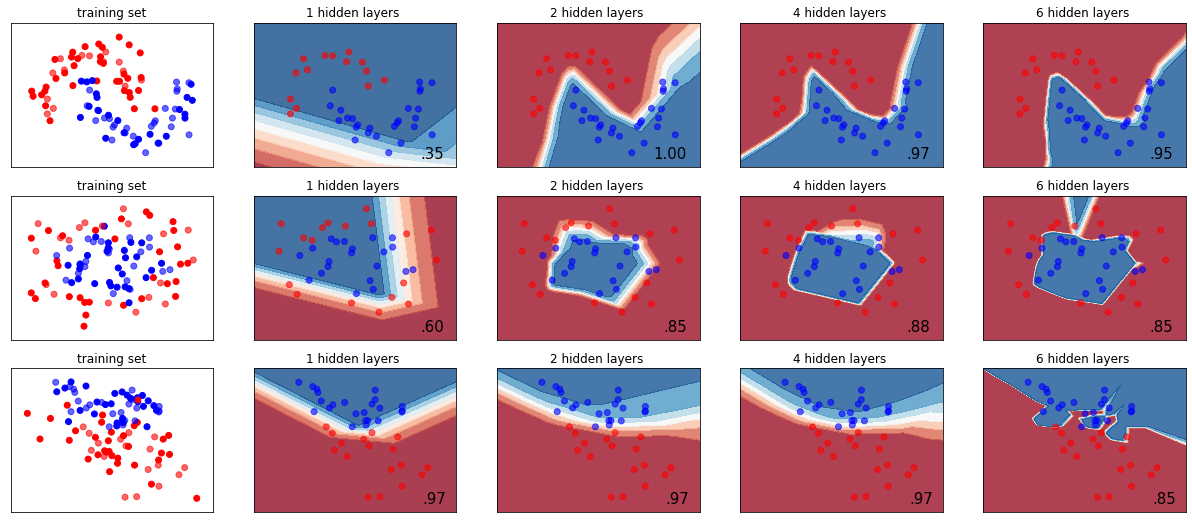

In [8]:

h = .02  # step size in the mesh
alphas = np.logspace(-5, 3, 5)
classifiers = []
#Define number of layers and neurons in each layer
hiddens = [[2], [10,10],[10,10,10,10],[10,10,10,10,10,10]]
classifiers = [MLPClassifier( random_state=1, hidden_layer_sizes=i,alpha=0.0, max_iter=10000) for i in hiddens]
hiddennumber = [len(i) for i in hiddens]
names = [str(i)+' hidden layers ' for i in hiddennumber]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(0)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.2, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=randomseed)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("training set")
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        #ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

        i += 1

figure.subplots_adjust(left=.02, right=.98)


<b> Figure 4. The predictive potential w.r.t the number of hidden layers

## References

1.	Nair, V., & Hinton, G. E. Rectified Linear Units Improve Restricted Boltzmann Machines. Proceedings of the 27th International Conference on Machine Learning, (3), 2010, pp. 807–814. http://doi.org/10.1.1.165.6419

2.	Xu, B., Wang, N., Chen, T., & Li, M. Empirical Evaluation of Rectified Activations in Convolution Network. ICML Deep Learning Workshop, 2015, pp. 1–5.

3.	Mohammadian, Abolfazl, and Eric Miller. Nested logit models and artificial neural networks for predicting household automobile choices: comparison of performance. Transportation Research Record: Journal of the Transportation Research Board 1807, 2002, pp. 92-100.

4.	Omrani, Hichem. Predicting Travel Mode of Individuals by Machine Learning. Transportation Research Procedia 10, 2015, pp. 840-849.

5.	L. Deng and D. Yu. Deep Learning: Methods and Applications. Found. Trends Signal Process., vol. 7, no. 3–4, 2013, pp. 197–387.

6.	Cantarella, Giulio Erberto, and Stefano de Luca. Multilayer feedforward networks for transportation mode choice analysis: An analysis and a comparison with random utility models. Transportation Research Part C: Emerging Technologies 13, no. 2, 2005, pp. 121-155. 
